In [4]:
# Load the dataset and explore the variables.
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot  as plt
data= pd.read_csv("customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges
data["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [6]:
#Extract the target variable
# X/y split
X = data.drop('Churn',axis = 1)
y = data['Churn']

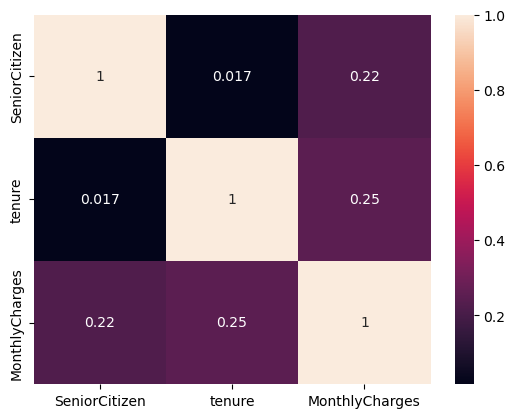

In [7]:

correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [8]:
data["SeniorCitizen"] =data["SeniorCitizen"].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:

numerics = ['integer', 'float']

numerical = data.select_dtypes(include=numerics).copy()

numerical.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


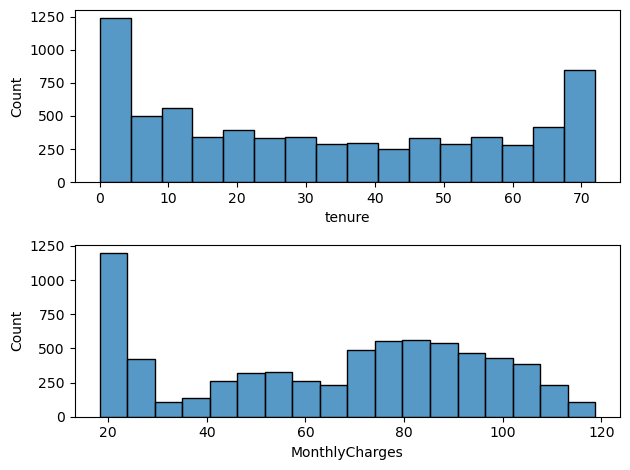

In [10]:
fig, axes = plt.subplots(2)
sns.histplot(data=numerical, x='tenure', ax=axes[0])
sns.histplot(data=numerical, x='MonthlyCharges', ax=axes[1])

plt.tight_layout()
plt.show()
#Do the distributions for different numerical variables look like a normal distribution

In [11]:
subjective_corr = numerical.corr()
subjective_corr

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [12]:
X["SeniorCitizen"] =X["SeniorCitizen"].astype("object")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train_num = X_train.select_dtypes(include = ["integer", "float"])
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [14]:
#For categorical variables

X_train_cat =X_train[['SeniorCitizen']]

X_train_cat.head()

,SeniorCitizen
1182,0
4328,0
6091,1
4870,0
4683,0


In [15]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed

array([[0.7916666666666666, 0.3532338308457711, 0],
       [0.20833333333333331, 0.32686567164179103, 0],
       [0.027777777777777776, 0.6825870646766168, 1],
       ...,
       [0.38888888888888884, 0.02238805970149252, 0],
       [0.9583333333333333, 0.7671641791044775, 1],
       [0.875, 0.5029850746268656, 0]], dtype=object)

In [16]:
#Extract the independent variables and scale them.
# all features are numeric, so no need to split into _num and _cat. Transformer = scaler
#from sklearn.preprocessing import StandardScaler
#transformer = StandardScaler()
#transformer.fit(X_train_transformed)

#X_train_scaled_np = transformer.transform(X_train_transformed)
#X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train_transformed.columns, index=X_train.index)


In [18]:
X_test_num = X_test.select_dtypes(include = ["integer", "float"])
# Scaling data
transformer = MinMaxScaler().fit(X_test_num) # need to keep transformer
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [19]:
X_test_cat =X_test[['SeniorCitizen']]

X_test_cat.head()



X_test_transformed = np.concatenate([X_test_norm,X_test_cat], axis=1)
X_test_transformed

array([[0.4305555555555555, 0.6086519114688128, 0],
       [0.027777777777777776, 0.6232394366197183, 0],
       [0.8333333333333333, 0.7962776659959758, 1],
       ...,
       [0.611111111111111, 0.7459758551307847, 0],
       [0.986111111111111, 0.9693158953722335, 0],
       [0.027777777777777776, 0.7017102615694164, 1]], dtype=object)

In [20]:
#Build the logistic regression model.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred_test = lr.predict(X_test_transformed)

In [21]:
logits = np.log(lr.predict_proba(X_train_transformed)[:,1]/(1-lr.predict_proba(X_train_transformed)[:,1]))

In [ ]:
# Evaluate the model.

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_transformed, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_transformed, y_test)))

The accuracy of the model in the TEST set is: 0.80


In [33]:
#Further evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import classification_report
print("score is", lr.score(X_test_transformed,y_test))
print("coher_kappa score is", cohen_kappa_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, zero_division = 0))

score is 0.7984386089425124
coher_kappa score is 0.4032367749170823
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1066
         Yes       0.61      0.46      0.53       343

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409



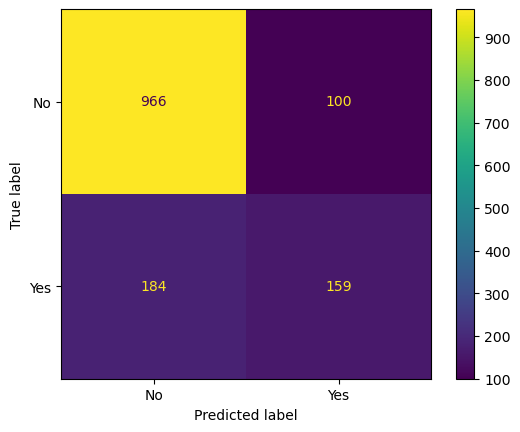

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_mat, display_labels=lr.classes_).plot()

In [ ]:
# Even a simple model will give us more than 70% accuracy. Why?

No     5174
Yes    1869
Name: Churn, dtype: int64


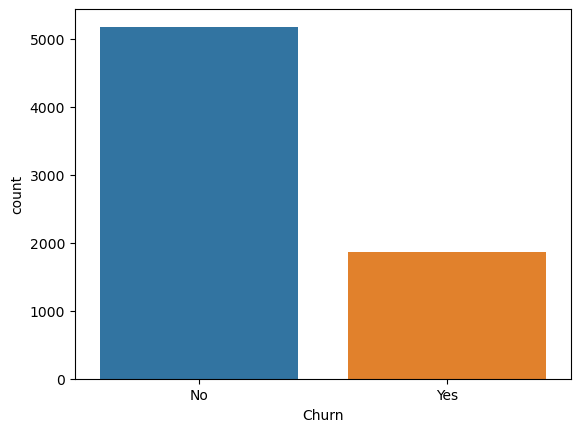

In [46]:
# Because we have a significant imbalance
count_classes = data['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = data);
plt.show()

In [ ]:
# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors 
#that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. 
# Build and evaluate the logistic regression model. Is it there any improvement?

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [40]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 20)
(8216, 3)


In [41]:
y_train_SMOTE.value_counts()

No     4108
Yes    4108
Name: Churn, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_transformed)

print("score is", lr.score(X_test_transformed,y_test))
print("coher_kappa score is", cohen_kappa_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, zero_division = 0))

score is 0.7267565649396736
coher_kappa score is 0.37706056969620405
              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1066
         Yes       0.46      0.72      0.56       343

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.79      0.73      0.74      1409



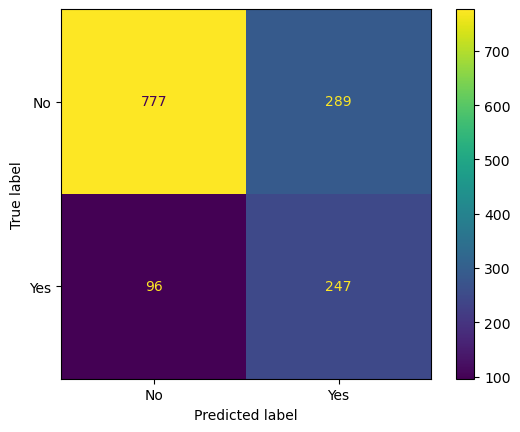

In [44]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# After aplying SMOTE the predictions do not seem to experience a significative improvement